<a href="https://www.kaggle.com/code/kaoutharhamdan/detecting-gender-bias-in-income-prediction?scriptVersionId=292364083" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Detecting Gender Bias in Income Prediction**

let`s make a situation:

*context:*

A government researcher  wants to analyze the potential gender bias in income predictions.
The dataset contains:

1. sex: Male / Female (sensitive attribute)
2. income: >50K / <=50K (binary target variable)
3. Other features: age, education, marital_status, occupation, hours_per_week, etc.

*Overall objective*: Build an ML model to predict whether someone earns >50K and check whether the model is fair with respect to gender.


In [1]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/kaggle/input/adult-census-income/adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

# Statistical analysis of raw data :

**The question:**

Is the income rate different between men and women in historical data?



In [8]:
# rate of woman vs men
gender_counts = df['sex'].value_counts().sort_index()
gender_counts

sex
Female    10771
Male      21790
Name: count, dtype: int64

In [9]:
total = len(df)
male_prop = gender_counts.Male / total
female_prop = gender_counts.Female / total


In [10]:
print(f"\nProportion of males: {male_prop:.2%}")
print(f"Proportion of females: {female_prop:.2%}")


Proportion of males: 66.92%
Proportion of females: 33.08%


In [11]:
print(f"\nProportion of males: {male_prop:.2%}")
print(f"Proportion of females: {female_prop:.2%}")


Proportion of males: 66.92%
Proportion of females: 33.08%


/tmp/ipykernel_17/1497730255.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bars = plt.bar(['Male', 'Female'], [gender_counts.get(1, 0), gender_counts.get(2, 0)])


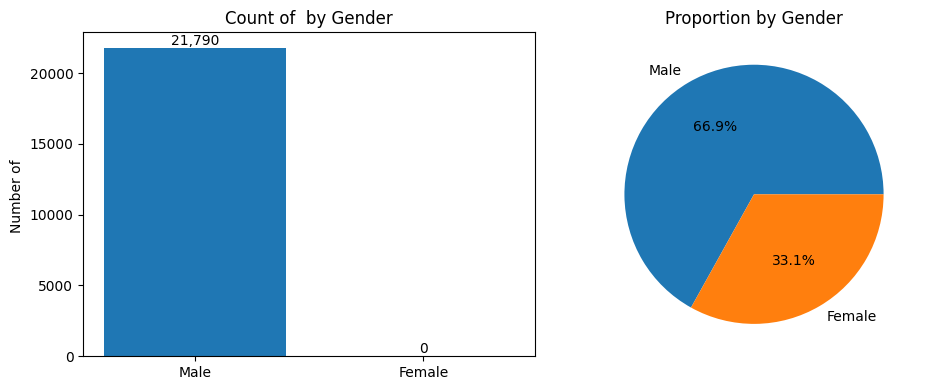

In [12]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
bars = plt.bar(['Male', 'Female'], [gender_counts.get(1, 0), gender_counts.get(2, 0)])
plt.title('Count of  by Gender')
plt.ylabel('Number of ')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie([male_prop, female_prop], labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Proportion by Gender')

plt.tight_layout()
plt.show()

In [13]:
df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

In [14]:
high_income_by_gender = df.groupby('sex')['income'].mean().sort_index()

low_income_by_gender = 1-high_income_by_gender
print(f"\n earning Rates (proportion earning >50K):")
print(f"Male (1): {high_income_by_gender.Male:.2%}")
print(f"Female (2): {high_income_by_gender.Female:.2%}")

print(f"\n earning Rates (proportion earning <=50K):")
print(f"Male (1): {low_income_by_gender.Male:.2%}")
print(f"Female (2): {low_income_by_gender.Female:.2%}")


 earning Rates (proportion earning >50K):
Male (1): 30.57%
Female (2): 10.95%

 earning Rates (proportion earning <=50K):
Male (1): 69.43%
Female (2): 89.05%


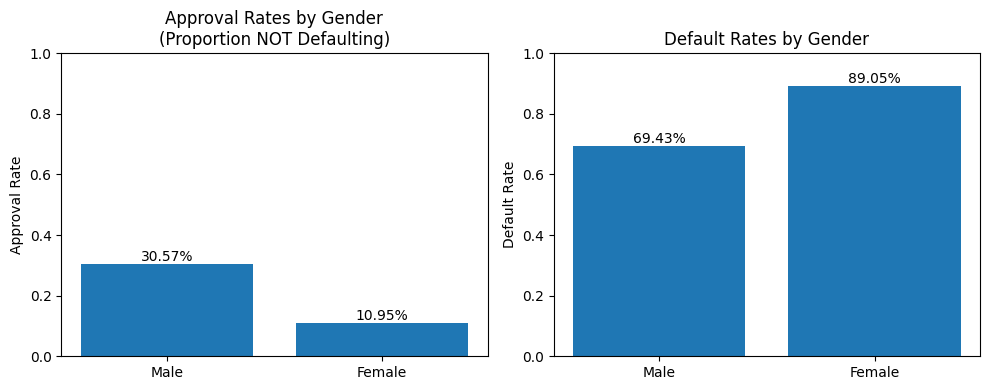

In [15]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
bars = plt.bar(['Male', 'Female'], [high_income_by_gender.Male, high_income_by_gender.Female])
plt.title('Approval Rates by Gender\n(Proportion NOT Defaulting)')
plt.ylabel('Approval Rate')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars = plt.bar(['Male', 'Female'], [low_income_by_gender.Male, low_income_by_gender.Female])
plt.title('Default Rates by Gender')
plt.ylabel('Default Rate')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [16]:
delta=high_income_by_gender.Male -high_income_by_gender.Female
delta

np.float64(0.19627598779361352)

In [17]:
print("\nAge Statistics by Gender:")
age_stats = df.groupby('sex')['age'].agg(['mean', 'median', 'std', 'min', 'max'])
print(age_stats)


Age Statistics by Gender:
             mean  median        std  min  max
sex                                           
Female  36.858230    35.0  14.013697   17   90
Male    39.433547    38.0  13.370630   17   90


In [18]:
# Marital status distribution
print("\nMarital Status Distribution by Gender:")

marital_cross = pd.crosstab(df['sex'], df['marital.status'], normalize='index')
print(marital_cross)


Marital Status Distribution by Gender:
marital.status  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                               
Female          0.248074           0.001300            0.153839   
Male            0.081276           0.000413            0.611244   

marital.status  Married-spouse-absent  Never-married  Separated   Widowed  
sex                                                                        
Female                       0.019033       0.442577   0.058583  0.076595  
Male                         0.009775       0.271501   0.018082  0.007710  


In [19]:
from scipy import stats
# Create binary approval variable (1 = approved, 0 = denied/defaulted)
df['approved'] = (df['income'] == 0).astype(int)


male_approved = df[df['sex'] == "Male"]['approved']
female_approved = df[df['sex'] == "Female"]['approved']

# Perform chi-square test for independence
contingency_table = pd.crosstab(df['sex'], df['approved'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square test for independence:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.10f}")

if p_value < 0.05:
    print(f"✓ Statistically significant difference in approval rates (p < 0.05)")
else:
    print(f"✗ No statistically significant difference in approval rates (p ≥ 0.05)")



Chi-square test for independence:
Chi-square statistic: 1517.8134
P-value: 0.0000000000
✓ Statistically significant difference in approval rates (p < 0.05)


In [20]:
# Perform two-proportion z-test
from statsmodels.stats.proportion import proportions_ztest

# Get counts
male_total = len(male_approved)
male_success = male_approved.sum()
female_total = len(female_approved)
female_success = female_approved.sum()

# Perform z-test
count = np.array([male_success, female_success])
nobs = np.array([male_total, female_total])
z_stat, p_val = proportions_ztest(count, nobs)

print(f"\nTwo-proportion z-test:")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.6f}")
if p_value < 0.05:
    print(f"✓ Statistically significant difference in approval rates (p < 0.05)")
else:
    print(f"✗ No statistically significant difference in approval rates (p ≥ 0.05)")



Two-proportion z-test:
Z-statistic: -38.9729
P-value: 0.000000
✓ Statistically significant difference in approval rates (p < 0.05)


# ML modeling


## Data Preproccesing : 

In [21]:
X = df.drop(columns=['income']+["approved"])
y = df['income']

In [22]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [23]:
cat_features = X.select_dtypes(include='object').columns.tolist()



In [24]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y ,test_size=0.2, train_size=0.8,random_state=42, stratify=y)

## Catboost

In [25]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=50
)


In [26]:
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_valid, y_valid),
    early_stopping_rounds=50
)


0:	learn: 0.8455160	test: 0.8410871	best: 0.8410871 (0)	total: 98.1ms	remaining: 49s
50:	learn: 0.8694334	test: 0.8608936	best: 0.8608936 (49)	total: 1.79s	remaining: 15.8s
100:	learn: 0.8771883	test: 0.8685706	best: 0.8688776 (96)	total: 3.33s	remaining: 13.1s
150:	learn: 0.8827933	test: 0.8711807	best: 0.8711807 (148)	total: 4.96s	remaining: 11.5s
200:	learn: 0.8858262	test: 0.8724090	best: 0.8725626 (191)	total: 6.52s	remaining: 9.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8725625672
bestIteration = 191

Shrink model to first 192 iterations.


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_valid)

print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4945
           1       0.78      0.66      0.71      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513

[[4648  297]
 [ 533 1035]]


# **Statistical analysis of ML predictions**

## Subgroup Analysis 

In [28]:
male_mask = X_valid['sex'] == 'Male'
female_mask = X_valid['sex'] == 'Female'

In [29]:
male_data = X_valid[male_mask]
female_data = X_valid[female_mask]

In [30]:
male_data = male_data.copy()
male_data['y_pred'] = y_pred[male_mask]
male_data['y_true'] = y_valid[male_mask]

female_data = female_data.copy()
female_data['y_pred'] = y_pred[female_mask]
female_data['y_true'] = y_valid[female_mask]

In [31]:
p_male = male_data['y_pred'].mean()
p_female = female_data['y_pred'].mean()
delta_ml = p_male - p_female

print("P(Ŷ=1 | Male):", p_male)
print("P(Ŷ=1 | Female):", p_female)
print("Difference (Δ):", delta_ml)

P(Ŷ=1 | Male): 0.2665137614678899
P(Ŷ=1 | Female): 0.07895959126799815
Difference (Δ): 0.18755417019989176


model favors men

## Statistical inference

In [32]:
def bootstrap_delta(df, n_bootstrap=1000):
    deltas = []
    for _ in range(n_bootstrap):
        sample = df.sample(frac=1, replace=True)
        p_m = sample[sample['sex'] == 'Male']['y_pred'].mean()
        p_f = sample[sample['sex'] == 'Female']['y_pred'].mean()
        deltas.append(p_m - p_f)
    return np.percentile(deltas, [2.5, 97.5]), np.mean(deltas)

# Combine male and female for bootstrap
df_eval = pd.concat([male_data, female_data])
ci, mean_delta = bootstrap_delta(df_eval)
print("Bootstrap mean Δ:", mean_delta)
print("95% CI for Δ:", ci)

Bootstrap mean Δ: 0.187618474086962
95% CI for Δ: [0.17080683 0.2041312 ]


If 0 ∉ CI → bias is statistically significant
the model actaully choose men 


## Fairness metrics

**Fairness Evaluation**

We evaluate potential gender bias in model predictions using standard fairness metrics from the algorithmic fairness literature.

**Metrics Used**
***1. Disparate Impact (DI)***

We compute the ratio of positive prediction rates between females and males:

DI = P(Y_hat = 1 | Female) / P(Y_hat = 1 | Male)


Interpretation:

DI ≈ 1 → Fair outcomes

DI < 0.8 → Potential adverse impact (80% rule)

DI > 1.25 → Possible reverse disparity

***2. Two-Proportion Z-Test***

To test whether the difference in positive prediction rates is statistically significant, we apply a two-proportion z-test:

H0: P(Y_hat = 1 | Female) = P(Y_hat = 1 | Male)


A low p-value (e.g., p < 0.05) indicates a statistically significant disparity between groups.

In [33]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([male_data['y_pred'].sum(), female_data['y_pred'].sum()])
nobs = np.array([len(male_data), len(female_data)])

z_stat, p_value = proportions_ztest(count, nobs)
print("Z-stat:", z_stat)
print("p-value:", p_value)

di = p_female / p_male
print("Disparate Impact (Female/Male):", di)

Z-stat: 17.653207053207073
p-value: 9.613847668857332e-70
Disparate Impact (Female/Male): 0.29626834589369355


The fairness analysis reveals a severe and statistically significant gender disparity in the model’s predictions.

The two-proportion z-test yields a very large Z-statistic (Z = 17.65) with an extremely small p-value (p ≈ 9.6 × 10⁻⁷⁰), leading to a strong rejection of the null hypothesis that male and female positive prediction rates are equal. This indicates that the observed difference is not due to random variation.

Furthermore, the Disparate Impact ratio is 0.30, which is well below the 0.8 threshold commonly used to flag adverse impact. This means that females receive positive predictions at less than one-third the rate of males.